In [49]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv('weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],inplace=True)

In [6]:
df.drop('Date',axis=1,inplace=True)

In [10]:
df['WindGustSpeed'].unique()

array([ 44.,  46.,  24.,  41.,  56.,  50.,  35.,  80.,  28.,  30.,  31.,
        61.,  nan,  22.,  63.,  43.,  26.,  33.,  57.,  48.,  39.,  37.,
        52.,  98.,  54.,  83.,  59.,  70.,  69.,  17.,  20.,  19.,  15.,
        13.,  11.,  72.,  85.,  65.,  78., 107.,  74.,  67.,  94.,  76.,
        81.,  87.,   9.,   7.,  89.,  91.,  93., 102., 100., 113., 117.,
        96., 111., 106., 135., 104., 120., 115., 126., 109., 122., 124.,
       130.,   6.])

In [ ]:
df['Pressure9am'].unique()

<Axes: xlabel='WindGustSpeed', ylabel='Density'>

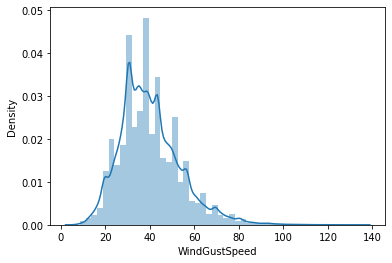

In [13]:
sns.distplot(df['WindGustSpeed'])

<Axes: xlabel='Pressure9am', ylabel='Density'>

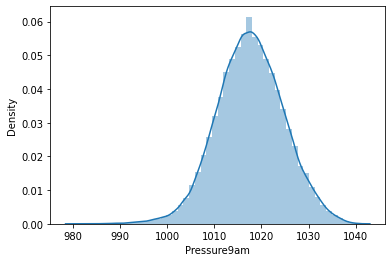

In [14]:
sns.distplot(df['Pressure9am'])

<Axes: xlabel='Pressure3pm', ylabel='Density'>

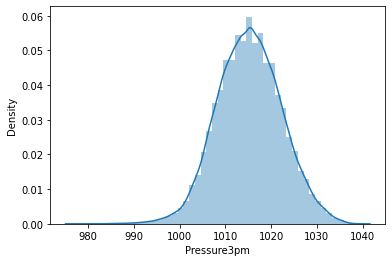

In [16]:
sns.distplot(df['Pressure3pm'])

In [15]:
from sklearn.impute import SimpleImputer

In [18]:
si=SimpleImputer(missing_values=np.nan,strategy='mean')
df[['WindGustSpeed','Pressure9am','Pressure3pm']]=si.fit_transform(df[['WindGustSpeed','Pressure9am','Pressure3pm']])

In [19]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [21]:
df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [23]:
si1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[['WindGustDir']]=si1.fit_transform(df[['WindGustDir']])

In [26]:
df[['WindDir9am']]=si1.fit_transform(df[['WindDir9am']])

In [24]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.00000,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.00000,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.00000,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.00000,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.00000,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.00000,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NNW,22.00000,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,N,37.00000,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,SE,28.00000,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No


In [27]:
df.isnull().sum()

Location            0
MinTemp          1485
MaxTemp          1261
Rainfall         3261
WindGustDir         0
WindGustSpeed       0
WindDir9am          0
WindDir3pm       4228
WindSpeed9am     1767
WindSpeed3pm     3062
Humidity9am      2654
Humidity3pm      4507
Pressure9am         0
Pressure3pm         0
Temp9am          1767
Temp3pm          3609
RainToday        3261
RainTomorrow     3267
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134590 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       134590 non-null  object 
 1   MinTemp        134590 non-null  float64
 2   MaxTemp        134590 non-null  float64
 3   Rainfall       134590 non-null  float64
 4   WindGustDir    134590 non-null  object 
 5   WindGustSpeed  134590 non-null  float64
 6   WindDir9am     134590 non-null  object 
 7   WindDir3pm     134590 non-null  object 
 8   WindSpeed9am   134590 non-null  float64
 9   WindSpeed3pm   134590 non-null  float64
 10  Humidity9am    134590 non-null  float64
 11  Humidity3pm    134590 non-null  float64
 12  Pressure9am    134590 non-null  float64
 13  Pressure3pm    134590 non-null  float64
 14  Temp9am        134590 non-null  float64
 15  Temp3pm        134590 non-null  float64
 16  RainToday      134590 non-null  object 
 17  RainTomorrow   134590 non-nul

In [31]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000,134590.000000
mean,12.189509,23.260816,2.314654,40.055133,14.118055,18.816286,68.659744,51.273891,1017.651663,1015.262058,16.978469,21.749529
std,6.375591,7.062406,8.375341,13.220449,8.832280,8.687083,19.091036,20.754483,6.793114,6.720401,6.471002,6.923049
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,2.000000,0.000000,0.000000,980.500000,977.100000,-7.200000,-5.400000
25%,7.600000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,36.000000,1013.400000,1011.000000,12.300000,16.700000
50%,12.000000,22.700000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.649940,1015.255889,16.700000,21.200000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.900000,1019.500000,21.500000,26.500000
max,33.900000,48.100000,371.000000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000


In [32]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']]=oe.fit_transform(df[['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday']])

In [33]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,No
1,2.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,No
2,2.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,No
3,2.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,No
4,2.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41.0,3.5,21.8,0.0,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,No
145455,41.0,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,No
145456,41.0,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,No
145457,41.0,5.4,26.9,0.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,No


In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['RainTomorrow']=le.fit_transform(df['RainTomorrow'])

In [36]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2.0,13.4,22.9,0.6,13.0,44.0,13.0,14.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0
1,2.0,7.4,25.1,0.0,14.0,44.0,6.0,15.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0
2,2.0,12.9,25.7,0.0,15.0,46.0,13.0,15.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0
3,2.0,9.2,28.0,0.0,4.0,24.0,9.0,0.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0
4,2.0,17.5,32.3,1.0,13.0,41.0,1.0,7.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,41.0,3.5,21.8,0.0,0.0,31.0,2.0,0.0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0
145455,41.0,2.8,23.4,0.0,0.0,31.0,9.0,1.0,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0
145456,41.0,3.6,25.3,0.0,6.0,22.0,9.0,3.0,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0
145457,41.0,5.4,26.9,0.0,3.0,37.0,9.0,14.0,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0


In [37]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [38]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [40]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [44]:
ann=Sequential()
ann.add(Dense(256,activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(128,activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(64,activation='relu'))
ann.add(Dropout(rate=0.25))
ann.add(Dense(1,activation='sigmoid'))

In [45]:
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [46]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history=ann.fit(xtrain,ytrain,epochs=200,batch_size=600,validation_data=(xtest,ytest),verbose=1,callbacks=[es])

Epoch 1/200
158/158 [==============================] - 5s 19ms/step - loss: 0.3862 - accuracy: 0.8350 - val_loss: 0.3519 - val_accuracy: 0.8500
Epoch 2/200
158/158 [==============================] - 2s 13ms/step - loss: 0.3586 - accuracy: 0.8475 - val_loss: 0.3488 - val_accuracy: 0.8509
Epoch 3/200
158/158 [==============================] - 2s 13ms/step - loss: 0.3539 - accuracy: 0.8494 - val_loss: 0.3460 - val_accuracy: 0.8522
Epoch 4/200
158/158 [==============================] - 2s 13ms/step - loss: 0.3509 - accuracy: 0.8505 - val_loss: 0.3449 - val_accuracy: 0.8521
Epoch 5/200
158/158 [==============================] - 2s 13ms/step - loss: 0.3479 - accuracy: 0.8514 - val_loss: 0.3469 - val_accuracy: 0.8537
Epoch 6/200
158/158 [==============================] - 3s 16ms/step - loss: 0.3483 - accuracy: 0.8522 - val_loss: 0.3424 - val_accuracy: 0.8536
Epoch 7/200
158/158 [==============================] - 2s 16ms/step - loss: 0.3452 - accuracy: 0.8530 - val_loss: 0.3444 - val_accuracy:

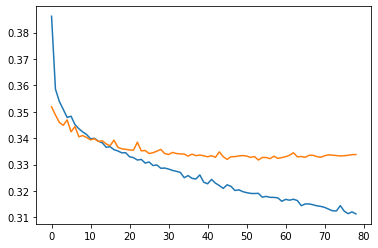

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [51]:
ypred=ann.predict(xtest)

1262/1262 [==============================] - 2s 2ms/step


In [52]:
ypred=np.where(ypred>0.5,1,0)

In [55]:
ypred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [56]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     31480
           1       0.74      0.55      0.63      8897

    accuracy                           0.86     40377
   macro avg       0.81      0.75      0.77     40377
weighted avg       0.85      0.86      0.85     40377

